In [ ]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['stroke.csv']))
dataset

Saving stroke.csv to stroke (1).csv


id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

Data Visualization

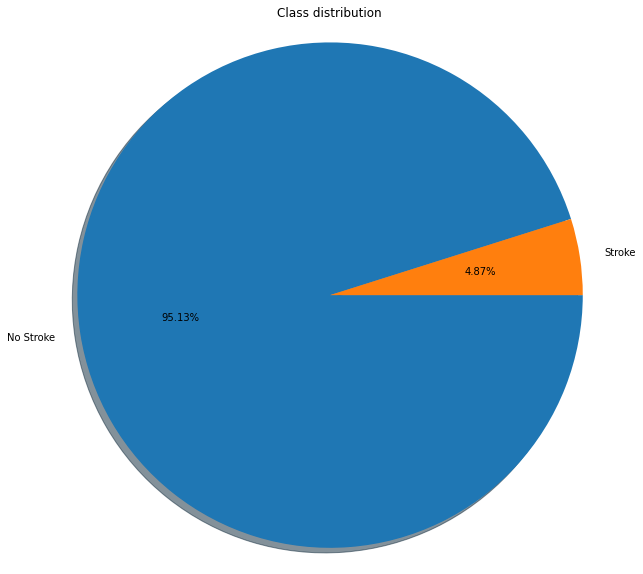

In [ ]:
class_occur = dataset['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  
ax.set_title('Class distribution')
plt.show()


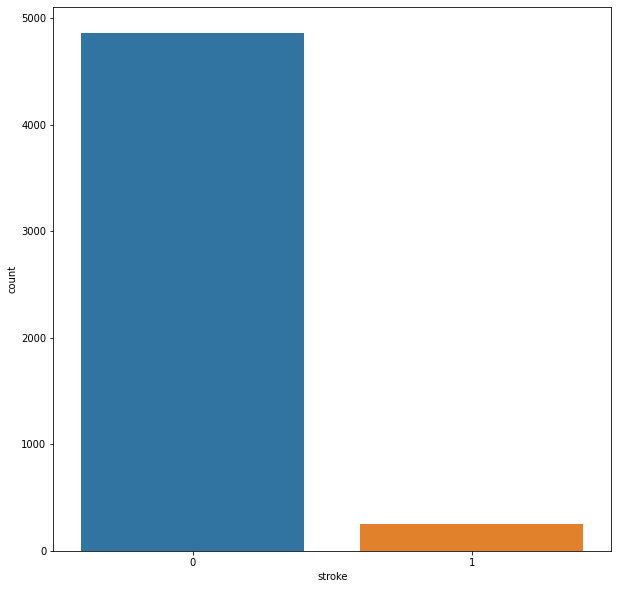

In [ ]:
sns.countplot(x = dataset['stroke'])
plt.rcParams['figure.figsize'] = (5,5)

Gender Count

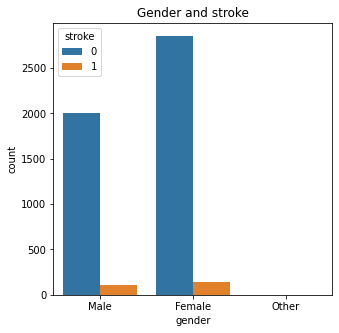

In [ ]:
sns.countplot(x=dataset['gender'],hue=dataset['stroke'])
plt.title('Gender and stroke')
plt.rcParams['figure.figsize']=(20,35)

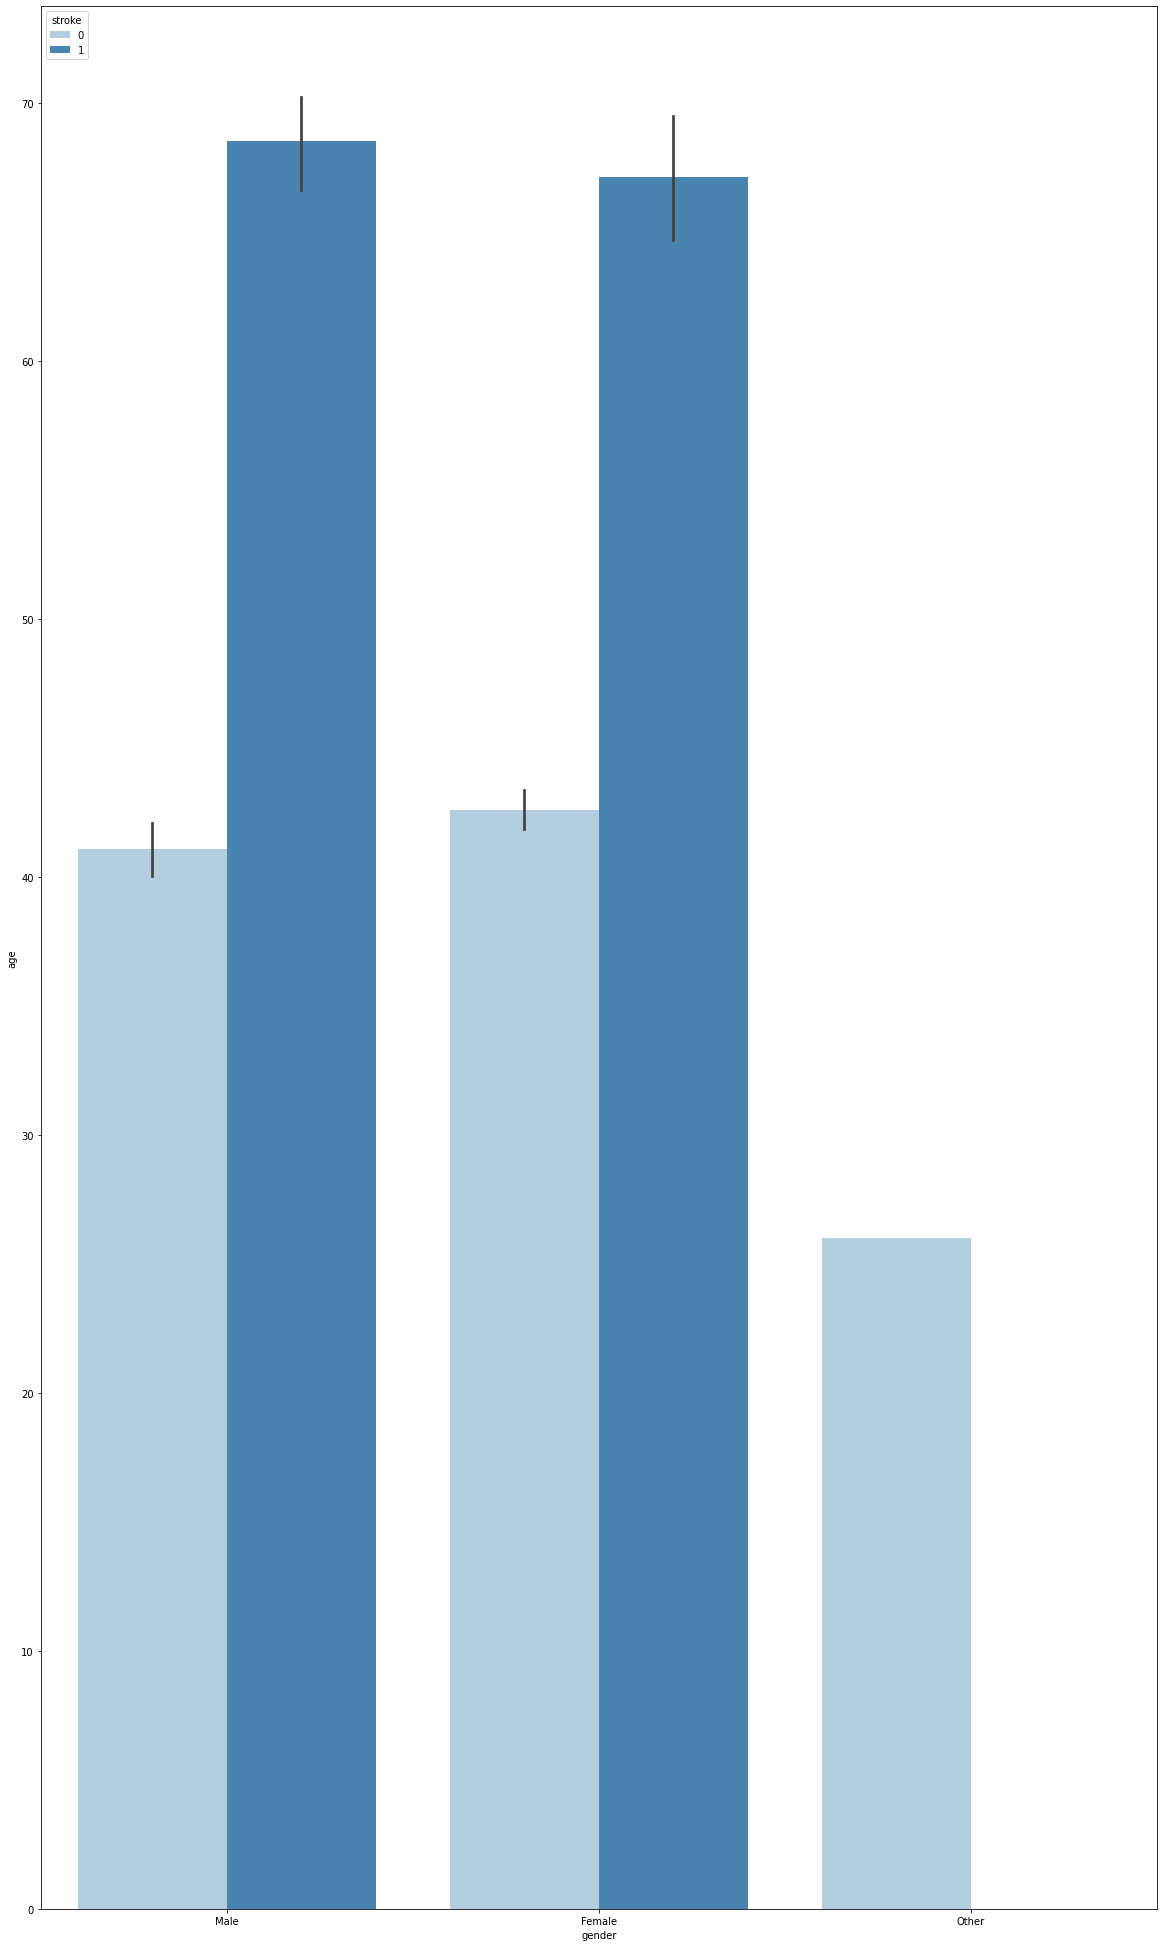

In [ ]:
sns.barplot(x = 'gender',y = 'age',hue = 'stroke',data = dataset, palette = "Blues")
plt.rcParams['figure.figsize'] = (10,10)

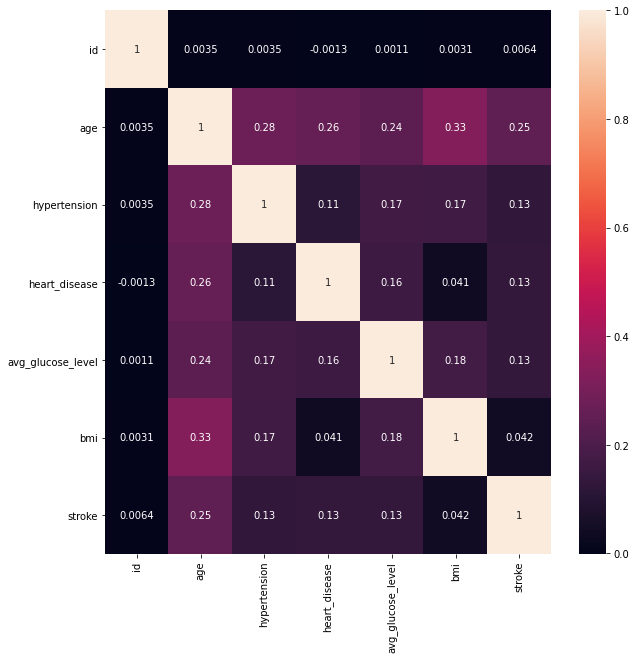

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True);

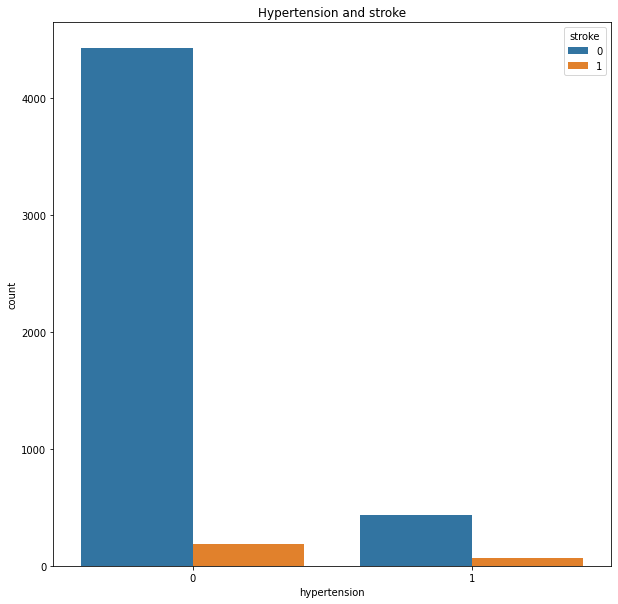

In [ ]:
sns.countplot(x=dataset['hypertension'],hue=dataset['stroke'])
plt.title('Hypertension and stroke')
plt.rcParams['figure.figsize'] = (10,10)

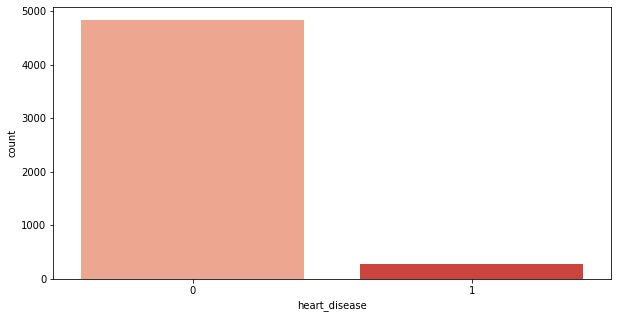

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='heart_disease',palette='Reds');

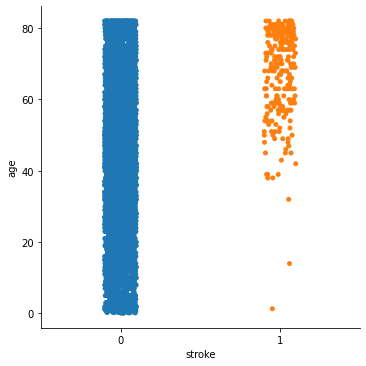

In [ ]:
sns.catplot(x='stroke',y='age',data=dataset)

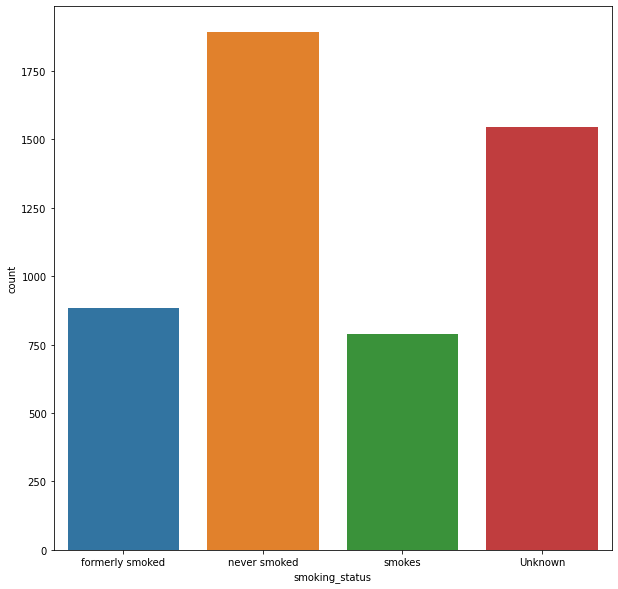

In [ ]:
sns.countplot(data=dataset,x='smoking_status')
plt.rcParams['figure.figsize'] = (10,10)

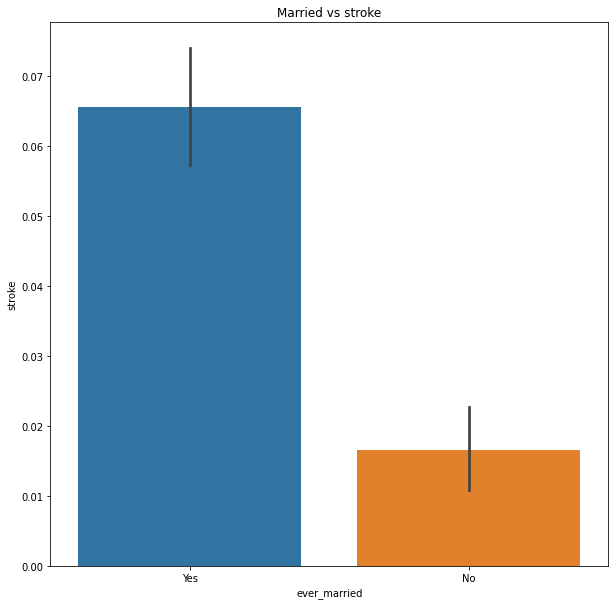

In [ ]:
sns.barplot(x=dataset['ever_married'],y=dataset['stroke'])
plt.title('Married vs stroke')
plt.rcParams['figure.figsize']=(10,10)

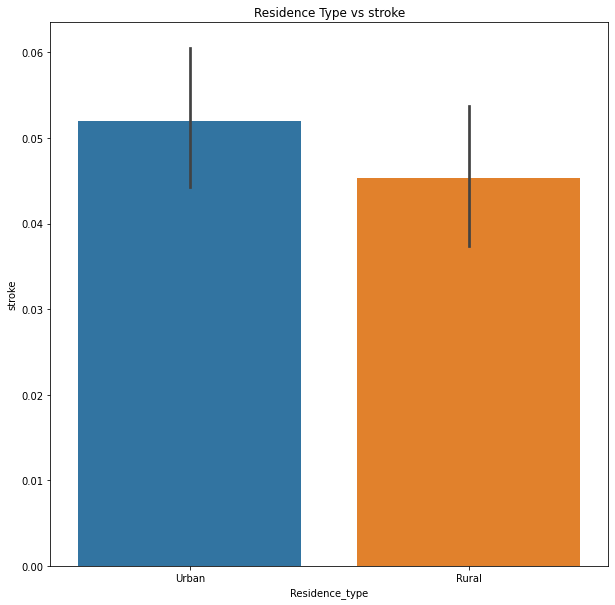

In [ ]:
sns.barplot(x=dataset['Residence_type'],y=dataset['stroke'])
plt.title('Residence Type vs stroke')
plt.rcParams['figure.figsize']=(10,10)

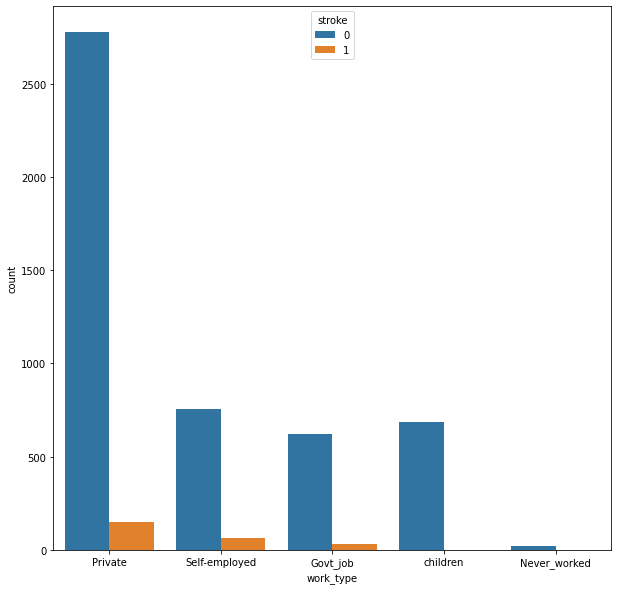

In [ ]:
sns.countplot(data=dataset,x='work_type',hue='stroke')

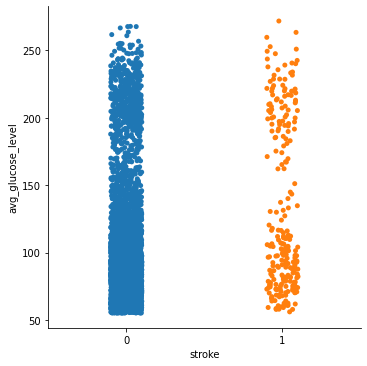

In [ ]:
sns.catplot(x='stroke',y='avg_glucose_level',data=dataset)

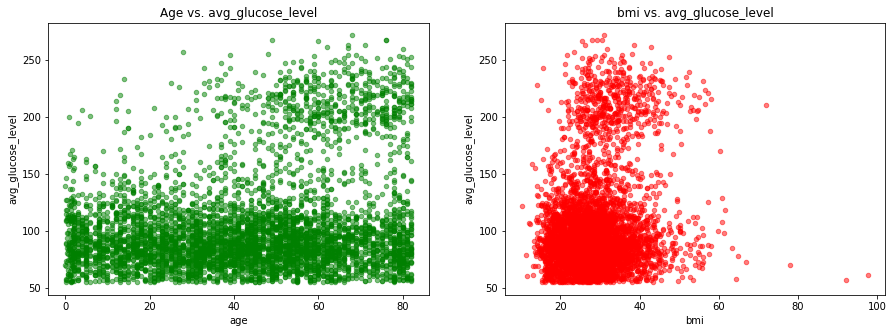

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dataset.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
dataset.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

EXPLORATORY DATA ANALYSIS

In [ ]:
dataset.head()

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


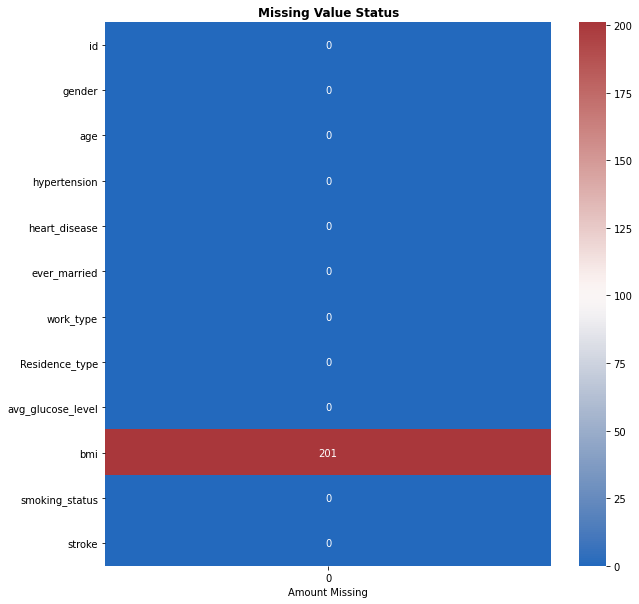

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Lets Fill Null Values

In [ ]:
dataset['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [ ]:
dataset['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
dataset['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
dataset['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
dataset['bmi'].fillna(dataset['bmi'].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
dataset.drop('id',axis=1,inplace=True)

In [ ]:
dataset

gender   age  hypertension  ...        bmi   smoking_status stroke
0       Male  67.0             0  ...  36.600000  formerly smoked      1
1     Female  61.0             0  ...  28.893237     never smoked      1
2       Male  80.0             0  ...  32.500000     never smoked      1
3     Female  49.0             0  ...  34.400000           smokes      1
4     Female  79.0             1  ...  24.000000     never smoked      1
...      ...   ...           ...  ...        ...              ...    ...
5105  Female  80.0             1  ...  28.893237     never smoked      0
5106  Female  81.0             0  ...  40.000000     never smoked      0
5107  Female  35.0             0  ...  30.600000     never smoked      0
5108    Male  51.0             0  ...  25.600000  formerly smoked      0
5109  Female  44.0             0  ...  26.200000          Unknown      0

[5110 rows x 11 columns]

Outlier Removal

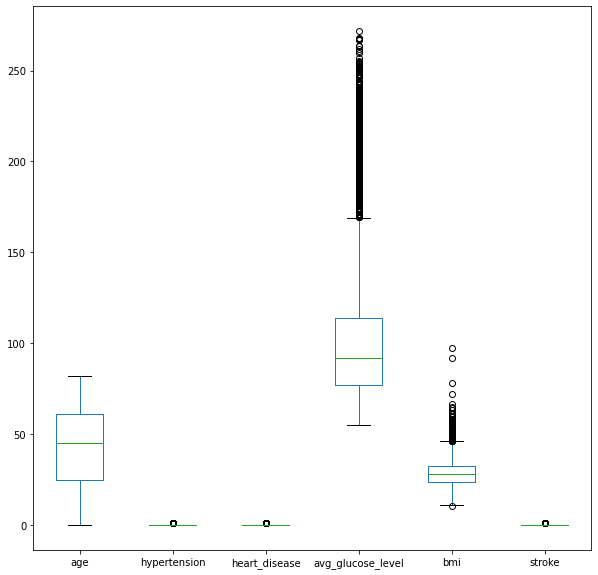

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
dataset.plot(kind='box')
plt.show()


In [ ]:
dataset['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
dataset[dataset['avg_glucose_level']>114.090000]

gender   age  hypertension  ...        bmi   smoking_status stroke
0       Male  67.0             0  ...  36.600000  formerly smoked      1
1     Female  61.0             0  ...  28.893237     never smoked      1
3     Female  49.0             0  ...  34.400000           smokes      1
4     Female  79.0             1  ...  24.000000     never smoked      1
5       Male  81.0             0  ...  29.000000  formerly smoked      1
...      ...   ...           ...  ...        ...              ...    ...
5071    Male  81.0             0  ...  35.800000          Unknown      0
5076  Female  34.0             0  ...  23.000000     never smoked      0
5086  Female  51.0             0  ...  21.800000          Unknown      0
5106  Female  81.0             0  ...  40.000000     never smoked      0
5108    Male  51.0             0  ...  25.600000  formerly smoked      0

[1277 rows x 11 columns]

Sampling

In [ ]:
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
Stroke = len(dataset[dataset['stroke']==1])

In [ ]:
No_Stroke = len(dataset[dataset['stroke']==0])

In [ ]:
print(Stroke)
print(No_Stroke)

249
4861


In [ ]:
index_No_Stroke = dataset[dataset['stroke']==0].index

index_Stroke = dataset[dataset['stroke']==1].index


In [ ]:
random_indices = np.random.choice(index_No_Stroke, Stroke,replace='False')

In [ ]:
len(random_indices)

249

In [ ]:
under_sample_indices = np.concatenate([index_Stroke,random_indices])

In [ ]:
under_sample_df = dataset.iloc[under_sample_indices]

In [ ]:
under_sample_df

gender   age  hypertension  ...        bmi   smoking_status stroke
0       Male  67.0             0  ...  36.600000  formerly smoked      1
1     Female  61.0             0  ...  28.893237     never smoked      1
2       Male  80.0             0  ...  32.500000     never smoked      1
3     Female  49.0             0  ...  34.400000           smokes      1
4     Female  79.0             1  ...  24.000000     never smoked      1
...      ...   ...           ...  ...        ...              ...    ...
3162    Male  78.0             1  ...  28.893237          Unknown      0
4320    Male  44.0             1  ...  24.100000     never smoked      0
1157  Female  71.0             0  ...  39.400000  formerly smoked      0
2408    Male  52.0             0  ...  25.000000     never smoked      0
3461  Female  63.0             1  ...  24.300000     never smoked      0

[498 rows x 11 columns]

In [ ]:
from collections import Counter
Counter(under_sample_df['stroke'])

Counter({0: 249, 1: 249})

In [ ]:
under_sample_class_counts = pd.value_counts(under_sample_df['stroke'])

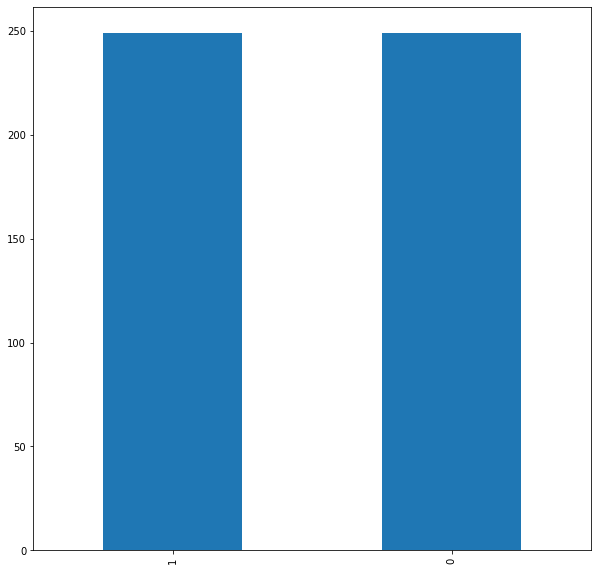

In [ ]:
under_sample_class_counts.plot(kind='bar')

In [ ]:
x_under = under_sample_df.loc[:, under_sample_df.columns!='stroke']
y_under = under_sample_df.loc[:, under_sample_df.columns=='stroke']
x_under.columns
y_under.columns

Index(['stroke'], dtype='object')

Label Encoding

In [ ]:
dataset['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
gender=encode.fit_transform(dataset['gender'])
ever_married=encode.fit_transform(dataset['ever_married'])
work_type=encode.fit_transform(dataset['work_type'])
smoking_status=encode.fit_transform(dataset['smoking_status'])
Residence_type=encode.fit_transform(dataset['Residence_type'])

In [ ]:
dataset['gender']=gender
dataset['ever_married']=ever_married
dataset['work_type']=work_type
dataset['smoking_status']=smoking_status
dataset['Residence_type']=Residence_type

In [ ]:
dataset

gender   age  hypertension  ...        bmi  smoking_status  stroke
0          1  67.0             0  ...  36.600000               1       1
1          0  61.0             0  ...  28.893237               2       1
2          1  80.0             0  ...  32.500000               2       1
3          0  49.0             0  ...  34.400000               3       1
4          0  79.0             1  ...  24.000000               2       1
...      ...   ...           ...  ...        ...             ...     ...
5105       0  80.0             1  ...  28.893237               2       0
5106       0  81.0             0  ...  40.000000               2       0
5107       0  35.0             0  ...  30.600000               2       0
5108       1  51.0             0  ...  25.600000               1       0
5109       0  44.0             0  ...  26.200000               0       0

[5110 rows x 11 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


Splitting the data for train and test

In [ ]:
X=dataset.drop('stroke',axis=1)

In [ ]:
X.head()

gender   age  hypertension  ...  avg_glucose_level        bmi  smoking_status
0       1  67.0             0  ...             228.69  36.600000               1
1       0  61.0             0  ...             202.21  28.893237               2
2       1  80.0             0  ...             105.92  32.500000               2
3       0  49.0             0  ...             171.23  34.400000               3
4       0  79.0             1  ...             174.12  24.000000               2

[5 rows x 10 columns]

In [ ]:
Y=dataset['stroke']

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=97)

In [ ]:
Y_train.head()

10      1
4576    0
1021    0
4296    0
4490    0
Name: stroke, dtype: int64

In [ ]:
X_train

gender   age  hypertension  ...  avg_glucose_level        bmi  smoking_status
10         0  81.0             1  ...              80.43  29.700000               2
4576       0  53.0             0  ...              94.14  27.700000               3
1021       0  37.0             0  ...              69.17  27.800000               2
4296       0  64.0             0  ...              75.13  31.100000               1
4490       1  19.0             0  ...              80.54  18.500000               3
...      ...   ...           ...  ...                ...        ...             ...
3356       1  55.0             0  ...              88.65  18.100000               1
3271       1  36.0             0  ...              74.63  31.600000               1
2997       1  71.0             0  ...             204.98  28.893237               1
105        1  58.0             0  ...              82.30  28.893237               3
2467       1  78.0             0  ...              74.70  28.800000               1

[4088 rows x 10 columns]

In [ ]:
X_test

gender   age  hypertension  ...  avg_glucose_level   bmi  smoking_status
1722       0  61.0             0  ...              73.36  16.1               2
1842       0  79.0             1  ...             119.62  39.0               0
1132       1   2.0             0  ...             103.25  19.4               0
180        0  46.0             0  ...              78.18  30.8               2
4709       1  15.0             0  ...             144.15  24.1               2
...      ...   ...           ...  ...                ...   ...             ...
4733       1  67.0             0  ...              83.16  25.5               1
1180       0  62.0             0  ...              82.57  36.0               1
3890       1  45.0             1  ...              74.28  37.2               1
2729       1  14.0             0  ...             142.38  17.6               2
320        1  22.0             0  ...             103.56  25.1               0

[1022 rows x 10 columns]

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=9)
fit=best_features.fit(X_train,Y_train)
fit.scores_
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
dfcolumns
dataset.head()
dfscores

0
0     0.396380
1  3234.961223
2    72.663002
3    82.942741
4    16.733444
5     1.679855
6     0.140374
7  1301.474288
8    15.171771
9     4.717092

In [ ]:
dataset.drop('gender',axis=1,inplace=True)
dataset.drop('Residence_type',axis=1,inplace=True)

In [ ]:
dataset.head()

age  hypertension  heart_disease  ...        bmi  smoking_status  stroke
0  67.0             0              1  ...  36.600000               1       1
1  61.0             0              0  ...  28.893237               2       1
2  80.0             0              1  ...  32.500000               2       1
3  49.0             0              0  ...  34.400000               3       1
4  79.0             1              0  ...  24.000000               2       1

[5 rows x 9 columns]

Normalization

In [ ]:
dataset.describe()

age  hypertension  ...  smoking_status       stroke
count  5110.000000   5110.000000  ...     5110.000000  5110.000000
mean     43.226614      0.097456  ...        1.376908     0.048728
std      22.612647      0.296607  ...        1.071534     0.215320
min       0.080000      0.000000  ...        0.000000     0.000000
25%      25.000000      0.000000  ...        0.000000     0.000000
50%      45.000000      0.000000  ...        2.000000     0.000000
75%      61.000000      0.000000  ...        2.000000     0.000000
max      82.000000      1.000000  ...        3.000000     1.000000

[8 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
X_train_std

array([[-8.45864273e-01,  1.68300497e+00,  3.03644529e+00, ...,
        -5.72185140e-01,  1.19351829e-01,  5.79352355e-01],
       [-8.45864273e-01,  4.44134723e-01, -3.29332461e-01, ...,
        -2.70792023e-01, -1.44543573e-01,  1.51142336e+00],
       [-8.45864273e-01, -2.63791131e-01, -3.29332461e-01, ...,
        -8.19718801e-01, -1.31348803e-01,  5.79352355e-01],
       ...,
       [ 1.17984935e+00,  1.24055131e+00, -3.29332461e-01, ...,
         2.16585371e+00,  1.29012942e-02, -3.52718651e-01],
       [ 1.17984935e+00,  6.65361552e-01, -3.29332461e-01, ...,
        -5.31076086e-01,  1.29012942e-02,  1.51142336e+00],
       [ 1.17984935e+00,  1.55026887e+00, -3.29332461e-01, ...,
        -6.98150316e-01,  5.98898018e-04, -3.52718651e-01]])

In [ ]:
X_test_std

array([[-0.84586427,  0.79809765, -0.32933246, ..., -0.72760814,
        -1.6751369 ,  0.57935236],
       [-0.84586427,  1.59451424,  3.03644529, ...,  0.28934631,
         1.34646545, -1.28478966],
       [ 1.17984935, -1.81237894, -0.32933246, ..., -0.07052278,
        -1.23970949, -1.28478966],
       ...,
       [ 1.17984935,  0.0901718 ,  3.03644529, ..., -0.70738337,
         1.10895958, -0.35271865],
       [ 1.17984935, -1.28143455, -0.32933246, ...,  0.78968966,
        -1.47721535,  0.57935236],
       [ 1.17984935, -0.92747162, -0.32933246, ..., -0.06370791,
        -0.48760759, -1.28478966]])

  Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred1=lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(Y_test,Y_pred1)

In [ ]:
ac_lr

0.9608610567514677

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, Y_pred1))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred1), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred1), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_test,Y_pred1)

array([[982,   0],
       [ 40,   0]])

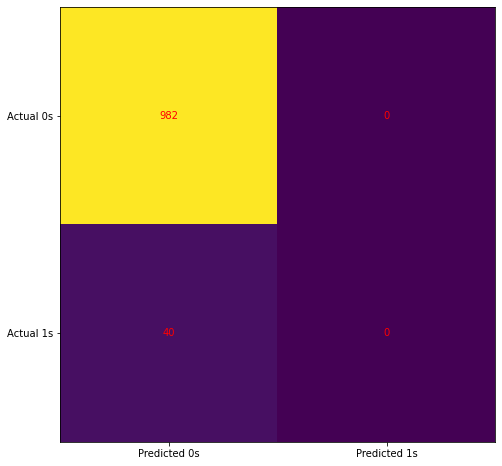

In [ ]:
cm = confusion_matrix(Y_test,Y_pred1)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Logistic Regression with HyperParameter

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train_std,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   34.1s finished


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print (f'Accuracy - : {best_clf.score(X_train_std,Y_train):.3f}')

Accuracy - : 0.949


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, Y_pred1))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred1), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred1), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred2=knn.predict(X_test_std)

In [ ]:
ac_knn=accuracy_score(Y_test,Y_pred2)

In [ ]:
ac_knn

0.958904109589041

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, Y_pred2))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred2), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred2), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


In [ ]:
confusion_matrix(Y_test,Y_pred2)

array([[980,   2],
       [ 40,   0]])

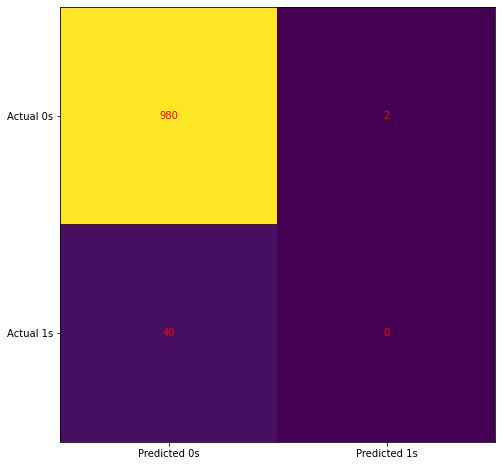

In [ ]:
cm = confusion_matrix(Y_test,Y_pred2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.feature_importances_

array([0.01793673, 0.20131974, 0.04659897, 0.01402292, 0.01312758,
       0.05015721, 0.04318212, 0.33579431, 0.21924407, 0.05861636])

In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
Y_pred=dt.predict(X_test_std)

In [ ]:
X_test

gender   age  hypertension  ...  avg_glucose_level   bmi  smoking_status
1722       0  61.0             0  ...              73.36  16.1               2
1842       0  79.0             1  ...             119.62  39.0               0
1132       1   2.0             0  ...             103.25  19.4               0
180        0  46.0             0  ...              78.18  30.8               2
4709       1  15.0             0  ...             144.15  24.1               2
...      ...   ...           ...  ...                ...   ...             ...
4733       1  67.0             0  ...              83.16  25.5               1
1180       0  62.0             0  ...              82.57  36.0               1
3890       1  45.0             1  ...              74.28  37.2               1
2729       1  14.0             0  ...             142.38  17.6               2
320        1  22.0             0  ...             103.56  25.1               0

[1022 rows x 10 columns]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_dt

0.913894324853229

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, Y_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred), 2))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       982
           1       0.12      0.20      0.15        40

    accuracy                           0.91      1022
   macro avg       0.55      0.57      0.55      1022
weighted avg       0.93      0.91      0.92      1022

Accuracy score:  0.91
F1 Score:  0.15


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[926,  56],
       [ 32,   8]])

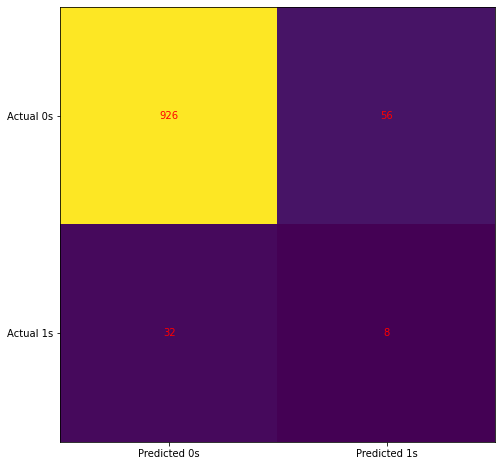

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

PLOT OF DECISION TREE

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

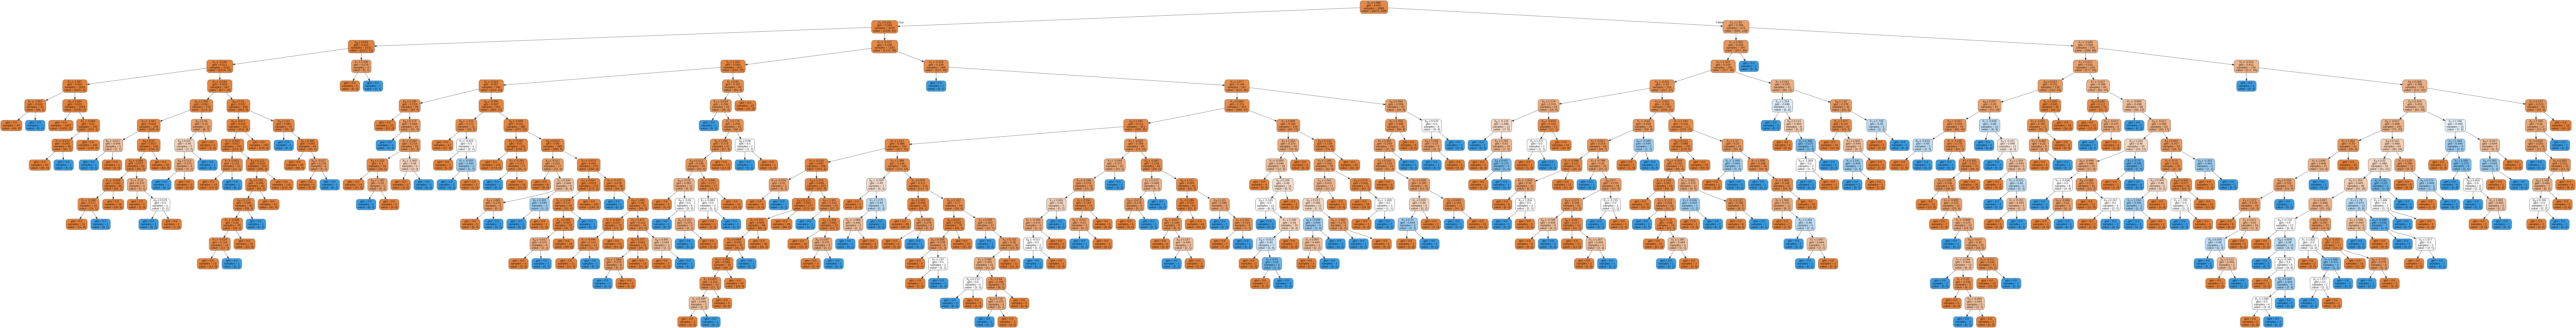

In [ ]:
#Printing the decision tree formed using pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
# Image.rcParams['figure.figsize'] = (10,10)

Decision Tree HyperParameter

In [ ]:
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
DT_grid.fit(X_train_std,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_Model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DT_Model.fit(X_train_std,Y_train)
y_pred=DT_Model.predict(X_test_std)

In [ ]:
print (f'Train Accuracy - : {DT_Model.score(X_train_std,Y_train):.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test_std,Y_test):.3f}')

Train Accuracy - : 0.949
Test Accuracy - : 0.959


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred3=rf.predict(X_test_std)

In [ ]:
ac_rf=accuracy_score(Y_test,Y_pred3)

In [ ]:
ac_rf

0.9598825831702544

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, Y_pred3))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred3), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred3), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


In [ ]:
confusion_matrix(Y_test,Y_pred3)

array([[981,   1],
       [ 40,   0]])

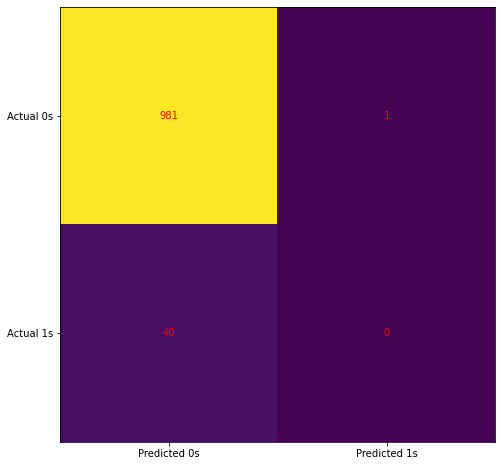

In [ ]:
cm = confusion_matrix(Y_test,Y_pred3)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

SVM(Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()

In [ ]:
sv.fit(X_train_std,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_predi = sv.predict(X_test_std)

In [ ]:
ac_sv = accuracy_score(Y_test,Y_predi)

In [ ]:
ac_sv

0.9608610567514677

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(Y_test, Y_predi))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_predi), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_predi), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_test,Y_predi)

array([[982,   0],
       [ 40,   0]])

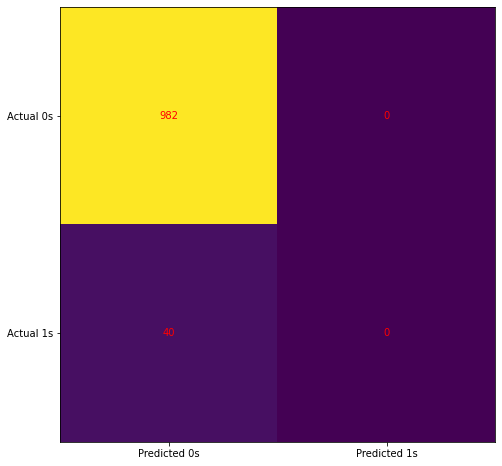

In [ ]:
cm = confusion_matrix(Y_test,Y_predi)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Naive Bayes

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, Y_train)
Y_predt=gnb.predict(X_test_std)
from sklearn.metrics import accuracy_score
ac_gnb=accuracy_score(Y_test,Y_predt)

In [ ]:
ac_gnb

0.8679060665362035

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, Y_predt))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_predt), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_predt), 2))
print('Confusion Matrix: ', confusion_matrix(Y_test, Y_predt))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       982
           1       0.13      0.40      0.19        40

    accuracy                           0.87      1022
   macro avg       0.55      0.64      0.56      1022
weighted avg       0.94      0.87      0.90      1022

Accuracy score:  0.87
F1 Score:  0.19
Confusion Matrix:  [[871 111]
 [ 24  16]]


In [ ]:
confusion_matrix(Y_test,Y_predt)

array([[871, 111],
       [ 24,  16]])

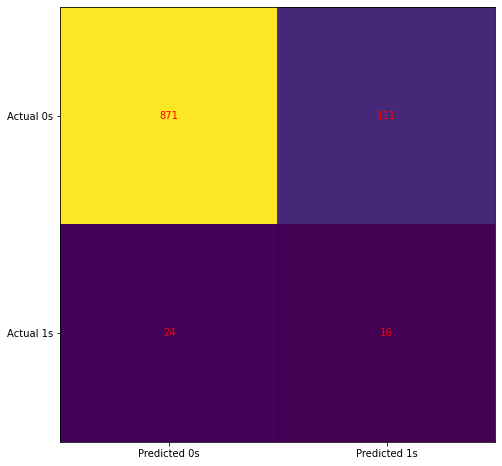

In [ ]:
cm = confusion_matrix(Y_test,Y_predt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Hyperparameter Tuning On Gaussian Naive Bayes 

In [ ]:
param_grid_nb = {
     'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_std, Y_train)
y_pred = nbModel_grid.predict(X_train_std)
print(nbModel_grid.best_estimator_)
# ...
# Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 926 tasks      | elapsed:    3.1s


GaussianNB(priors=None, var_smoothing=1.0)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.3s finished


GaussianNB(priors=None, var_smoothing=1.0)

In [ ]:
y_pred = nbModel_grid.predict(X_test_std)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred), ": is the accuracy score")
# from sklearn.metrics import precision_score
# print(precision_score(y_test, y_pred), ": is the precision score")
# from sklearn.metrics import recall_score
# print(recall_score(y_test, y_pred), ": is the recall score")
# from sklearn.metrics import f1_score
# print(f1_score(y_test, y_pred), ": is the f1 score")

[[936  46]
 [ 33   7]] : is the confusion matrix
0.9227005870841487 : is the accuracy score


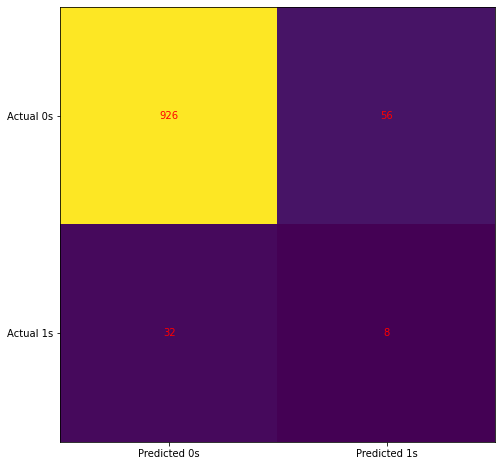

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, Y_predt))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_predt), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_predt), 2))
print('Confusion Matrix: ', confusion_matrix(Y_test, Y_predt))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       982
           1       0.13      0.40      0.19        40

    accuracy                           0.87      1022
   macro avg       0.55      0.64      0.56      1022
weighted avg       0.94      0.87      0.90      1022

Accuracy score:  0.87
F1 Score:  0.19
Confusion Matrix:  [[871 111]
 [ 24  16]]


Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_std, Y_train)
Y_predt = bnb.predict(X_test_std)
from sklearn.metrics import accuracy_score
ac_bnb = accuracy_score(Y_test,Y_pred)

In [ ]:
ac_bnb

0.913894324853229

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, Y_predt))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_predt), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_predt), 2))
print('Confusion Matrix: ', confusion_matrix(Y_test, Y_predt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       982
           1       0.16      0.07      0.10        40

    accuracy                           0.95      1022
   macro avg       0.56      0.53      0.54      1022
weighted avg       0.93      0.95      0.94      1022

Accuracy score:  0.95
F1 Score:  0.1
Confusion Matrix:  [[966  16]
 [ 37   3]]


In [ ]:
confusion_matrix(Y_test,Y_predt)

array([[966,  16],
       [ 37,   3]])

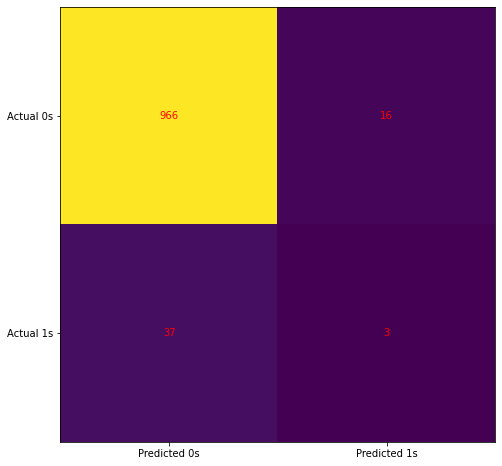

In [ ]:
cm = confusion_matrix(Y_test,Y_predt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Hyperparameter Tuning On Bernoulli Naive Bayes

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train_std,Y_train)
y_pred = bernoulli_nb_grid.predict(X_train_std)
print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_train_std, Y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test_std, Y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.941
Test Accuracy : 0.950
Best Accuracy Through Grid Search : 0.941
Best Parameters :  {'alpha': 10.0}
CPU times: user 139 ms, sys: 9.87 ms, total: 148 ms
Wall time: 254 ms


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [ ]:
Y_predj=bernoulli_nb_grid.predict(X_test_std)

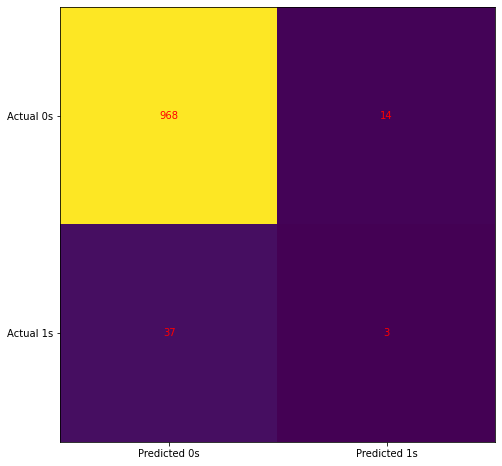

In [ ]:
cm = confusion_matrix(Y_test,Y_predj)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, Y_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred), 2))
print('Confusion Matrix: ', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       982
           1       0.12      0.20      0.15        40

    accuracy                           0.91      1022
   macro avg       0.55      0.57      0.55      1022
weighted avg       0.93      0.91      0.92      1022

Accuracy score:  0.91
F1 Score:  0.15
Confusion Matrix:  [[926  56]
 [ 32   8]]


Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
Y_predt = mnb.predict(X_test_std)
from sklearn.metrics import accuracy_score
ac_mnb = accuracy_score(Y_test,Y_pred)

In [ ]:
ac_mnb

0.913894324853229

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, Y_predt))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_predt), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_predt), 2))
print('Confusion Matrix: ', confusion_matrix(Y_test, Y_predt))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       982
           1       0.12      0.23      0.16        40

    accuracy                           0.91      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.93      0.91      0.92      1022

Accuracy score:  0.91
F1 Score:  0.16
Confusion Matrix:  [[917  65]
 [ 31   9]]


In [ ]:
confusion_matrix(Y_test,Y_predt)

array([[917,  65],
       [ 31,   9]])

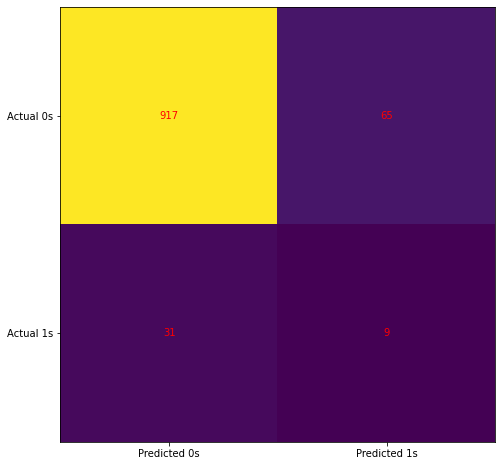

In [ ]:
cm = confusion_matrix(Y_test,Y_predt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Hyperparameter Tuning of Multinomial Naive Bayes 

In [ ]:
%%time

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,Y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train_std, Y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test_std, Y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.889
Test Accuracy : 0.888
Best Accuracy Through Grid Search : 0.809
Best Parameters :  {'alpha': 10.0}
CPU times: user 186 ms, sys: 14.4 ms, total: 200 ms
Wall time: 364 ms


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss',use_label_encoder=False)
xgb = xgb.fit(X_train_std,Y_train)

Y_predti = xgb.predict(X_test_std)
ac_xgb=accuracy_score(Y_test, Y_predti)


In [ ]:
ac_xgb

0.9608610567514677

In [ ]:
print(classification_report(Y_test, Y_predti))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_predti), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_predti), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
 confusion_matrix(Y_test,Y_predti)


array([[982,   0],
       [ 40,   0]])

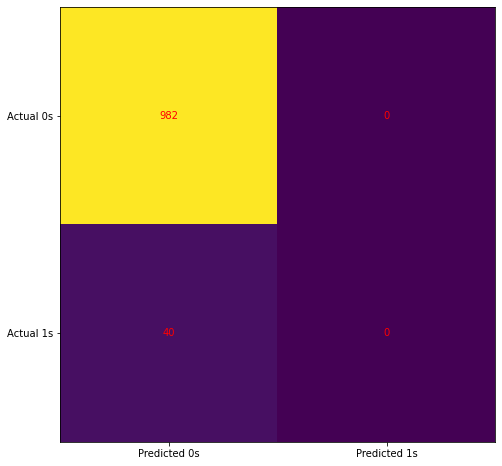

In [ ]:
cm = confusion_matrix(Y_test,Y_predti)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

HyperParameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from matplotlib import pyplot


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },

    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_std,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                best_params
0                  svm    0.948875  {'C': 1, 'kernel': 'rbf'}
1        random_forest    0.944471       {'n_estimators': 10}
2  logistic_regression    0.948386                   {'C': 1}

HyperParameter Tuning Of KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train_std, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    8.3s finished


In [ ]:
g_res.best_score_

0.9488748689672409

In [ ]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train_std, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_hat = knn.predict(X_train_std)
y_knn = knn.predict(X_test_std)

In [ ]:
import sklearn.metrics as metrics 
print('Training set accuracy: ', metrics.accuracy_score(Y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(Y_test, y_knn))

Training set accuracy:  0.9493639921722113
Test set accuracy:  0.958904109589041


HyperParameter Optimization Of XGBoost


In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
start_time = timer(None) 
random_search.fit(X_train_std,Y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.6s finished



 Time taken: 0 hours 0 minutes and 3.89 seconds.


In [ ]:
X.head()

gender   age  hypertension  ...  avg_glucose_level        bmi  smoking_status
0       1  67.0             0  ...             228.69  36.600000               1
1       0  61.0             0  ...             202.21  28.893237               2
2       1  80.0             0  ...             105.92  32.500000               2
3       0  49.0             0  ...             171.23  34.400000               3
4       0  79.0             1  ...             174.12  24.000000               2

[5 rows x 10 columns]

In [ ]:
random_search.best_estimator_
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 7}

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)
score

array([0.95107632, 0.95107632, 0.94911937, 0.95107632, 0.95107632,
       0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95303327])

In [ ]:
score.mean()

0.9510763209393346

Deep Learning

1).MLP Classifier 1

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8))

In [ ]:
mlp.fit(X_train_std,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
Y_pred = mlp.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score
ac_mlp = accuracy_score(Y_test,Y_pred)
ac_mlp

0.9608610567514677

In [ ]:
print(classification_report(Y_test, Y_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_pred), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        40

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Accuracy score:  0.96
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[982,   0],
       [ 40,   0]])

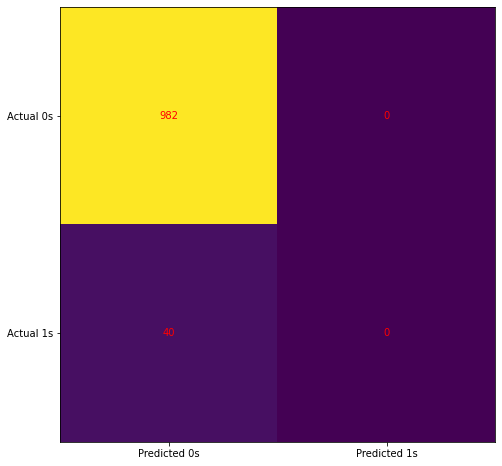

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Hyper Parameter Tuning on MLP Classifier

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf1 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf1.fit(X_train_std, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(8, 8),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['t

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf1.best_params_)

# All results
means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.949 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.928 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.949 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.928 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.949 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.932 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': '

In [ ]:
y_true, y_pred = Y_test , clf1.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.96      0.54      0.70       982
           1       0.04      0.47      0.08        40

    accuracy                           0.54      1022
   macro avg       0.50      0.51      0.39      1022
weighted avg       0.93      0.54      0.67      1022



In [ ]:
MLP_Model = MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state = None,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False)
MLP_Model.fit(X_train_std,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print (f'Train Accuracy - : {MLP_Model.score(X_train_std,Y_train):.3f}')
print (f'Test Accuracy - : {MLP_Model.score(X_test_std,Y_test):.3f}')

Train Accuracy - : 0.952
Test Accuracy - : 0.961


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[982,   0],
       [ 40,   0]])

Ensembling

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('dt',dt),
    ('lr',lr),
    ('knn',gs),
    ('svm',sv),
    ('gnb',gnb),
    ('bnb',bnb),
    ('mnb',mnb),
    ('xgb',xgb),
    ('mlp',mlp)
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, Y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
# stack_model_train_mcc = matthews_corrcoef(Y_train, y_train_pred) # Calculate MCC
# stack_model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
# stack_model_test_mcc = matthews_corrcoef(Y_test, y_test_pred) # Calculate MCC
# stack_model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score

# print('Model performance for Training set')
# print('- Accuracy: %s' % stack_model_train_accuracy)
# print('- MCC: %s' % stack_model_train_mcc)
# print('- F1 score: %s' % stack_model_train_f1)
# print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
# print('- MCC: %s' % stack_model_test_mcc)
# print('- F1 score: %s' % stack_model_test_f1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    4.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model performance for Test set
- Accuracy: 0.9608610567514677


In [ ]:
acc_test_list = {'Decision Tree':ac_dt,'Logistic Regression':ac_lr,'KNN':ac_knn,'Random Forest':ac_rf,'SVM':ac_sv,'GNB':ac_gnb,'BNB':ac_bnb,'MNB':ac_mnb,'XGBOOST':ac_xgb,'MLP':ac_mlp,'Stacking Ensemble': stack_model_test_accuracy}

In [ ]:
acc_test_list

{'BNB': 0.913894324853229,
 'Decision Tree': 0.913894324853229,
 'GNB': 0.8679060665362035,
 'KNN': 0.958904109589041,
 'Logistic Regression': 0.9608610567514677,
 'MLP': 0.9608610567514677,
 'MNB': 0.913894324853229,
 'Random Forest': 0.9598825831702544,
 'SVM': 0.9608610567514677,
 'Stacking Ensemble': 0.9608610567514677,
 'XGBOOST': 0.9608610567514677}

In [ ]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy without Hyper Parameter Tuning'])
df = pd.concat([acc_df], axis=1)
df

Accuracy without Hyper Parameter Tuning
Decision Tree                                       0.913894
Logistic Regression                                 0.960861
KNN                                                 0.958904
Random Forest                                       0.959883
SVM                                                 0.960861
GNB                                                 0.867906
BNB                                                 0.913894
MNB                                                 0.913894
XGBOOST                                             0.960861
MLP                                                 0.960861
Stacking Ensemble                                   0.960861

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
results = pd.read_csv(io.BytesIO(uploaded['Final Results Algos.csv']))
results

Saving Final Results Algos.csv to Final Results Algos (1).csv


Algorithm  ...  Final Accuracy (Best of the two)
0         Decision Tree  ...                            96.100
1   Logistic Regression  ...                            96.080
2                   KNN  ...                            95.890
3         Random Forest  ...                            95.988
4                   SVM  ...                            96.080
5                   GNB  ...                            92.270
6                   BNB  ...                            95.000
7                   MNB  ...                            91.095
8               XGBOOST  ...                            96.086
9                   MLP  ...                            96.080
10    Stacking Ensemble  ...                            96.086

[11 rows x 4 columns]

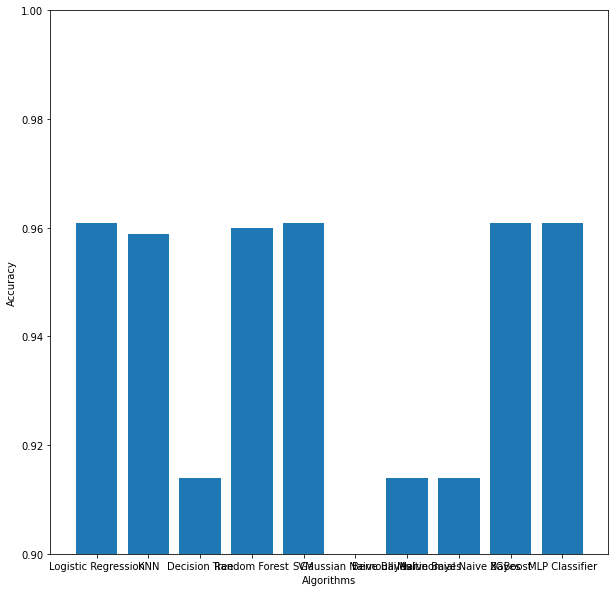

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(['Logistic Regression','KNN','Decision Tree','Random Forest','SVM','Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes','XGBoost','MLP Classifier'], [ac_lr,ac_knn,ac_dt,ac_rf,ac_sv,ac_gnb,ac_bnb,ac_mnb,ac_xgb,ac_mlp])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.rcParams['figure.figsize'] = (40,40)
plt.ylim(0.9,1)
plt.show()